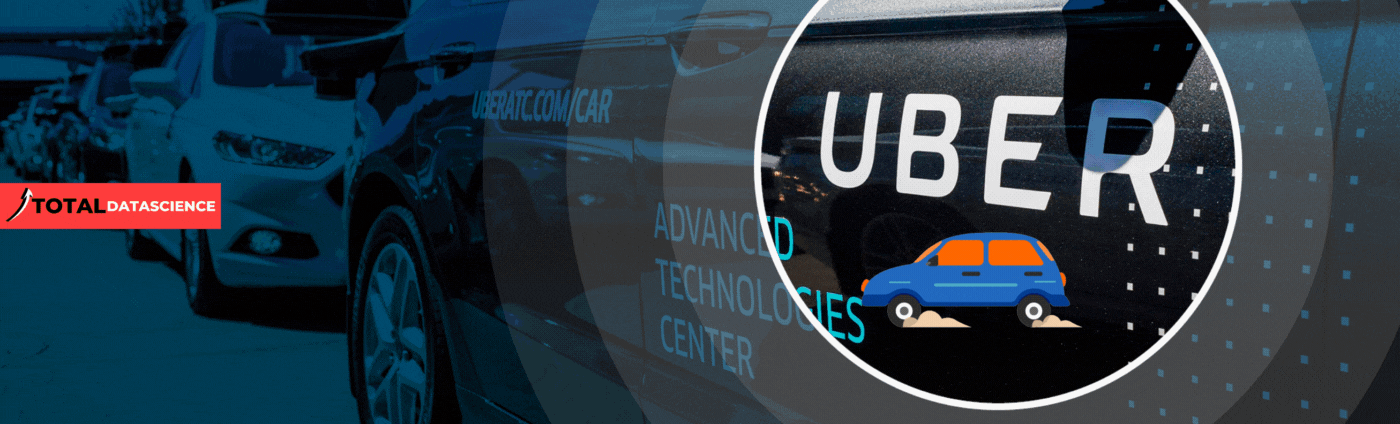

# Uber Data Analysis With Python

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

Used data regarding Uber ride

Used Python to analyze data from Uber.

We will use Python to:

Check how long do people travel with Uber?
What Hour Do Most People Take Uber To Their Destination?
Check The Purpose Of Trips
Which Day Has The Highest Number Of Trips
What Are The Number Of Trips Per Each Day?
What Are The Trips In The Month
The starting points of trips. Where Do People Start Boarding Their Trip From Most?


# Import The Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
data=pd.read_csv('Uber Drives.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Check for Mising Values

Let's check below if there data points missing in our dataset.

In [4]:
data.shape

(1156, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
from scipy import stats as st
st.skew(data['MILES*'])

33.773712697254744

In [10]:
st.kurtosis(data['MILES*'])

1142.6986540537553

C:\Users\91773\AppData\Local\Temp\ipykernel_4816\3003658599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

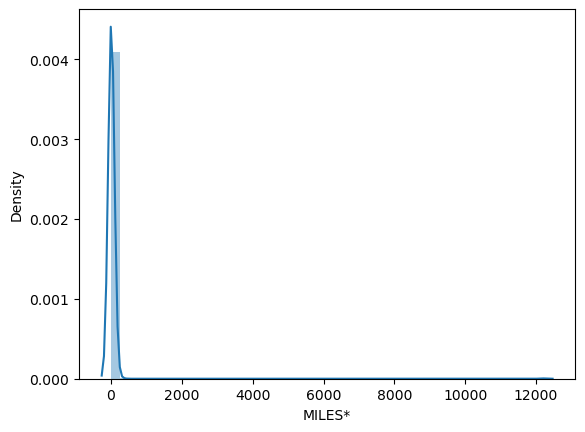

In [11]:
sns.distplot(data['MILES*'])

<Axes: >

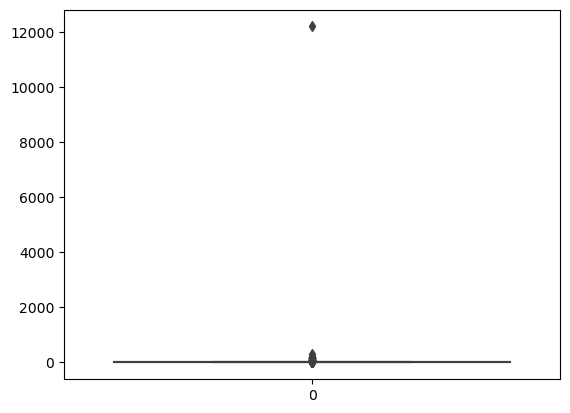

In [12]:
sns.boxplot(data['MILES*'])

In [14]:
np.percentile(data['MILES*'],75)

10.4

In [16]:
q99=np.percentile(data['MILES*'],99.9)

In [17]:
data['MILES*']=data['MILES*'].apply(lambda x: q99 if x>q99 else x)

<Axes: >

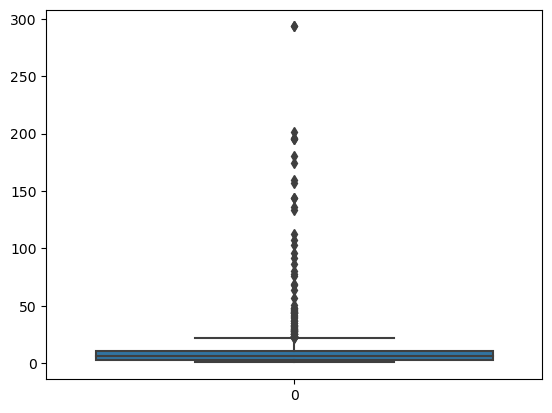

In [18]:
sns.boxplot(data['MILES*'])

In [19]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [20]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [21]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

we will drop all the NaN values in our dataset.

In [22]:
data.dropna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [23]:
data=data.dropna()

In [24]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [25]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

C:\Users\91773\AppData\Local\Temp\ipykernel_4816\2319322758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
C:\Users\91773\AppData\Local\Temp\ipykernel_4816\2319322758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [27]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

C:\Users\91773\AppData\Local\Temp\ipykernel_4816\852274172.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR']=hour
C:\Users\91773\AppData\Local\Temp\ipykernel_4816\852274172.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY']=day
C:\Users\91773\AppData\Local\Temp\ipykernel_4816\852274172.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
 7   HOUR         653 non-null    int64         
 8   DAY          653 non-null    int64         
 9   DAY_OF_WEEK  653 non-null    int64         
 10  MONTH        653 non-null    int64         
 11  WEEKDAY      653 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 66.3+ KB


In [29]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Categories We Have

In [30]:
data.nunique()

START_DATE*    652
END_DATE*      652
CATEGORY*        2
START*         131
STOP*          137
MILES*         205
PURPOSE*        10
HOUR            23
DAY             31
DAY_OF_WEEK      7
MONTH           11
WEEKDAY          7
dtype: int64

In [31]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

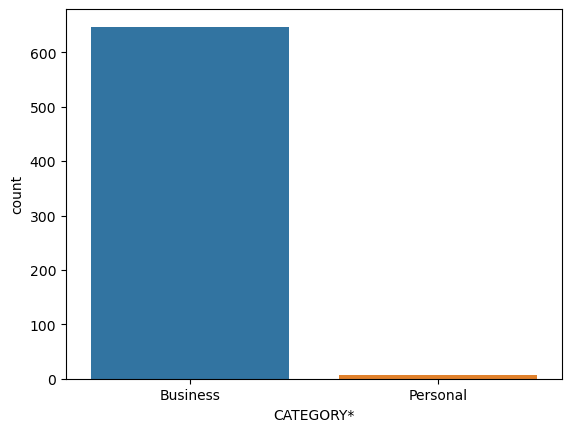

In [32]:
sns.countplot(x='CATEGORY*',data=data)

<Axes: xlabel='CATEGORY*'>

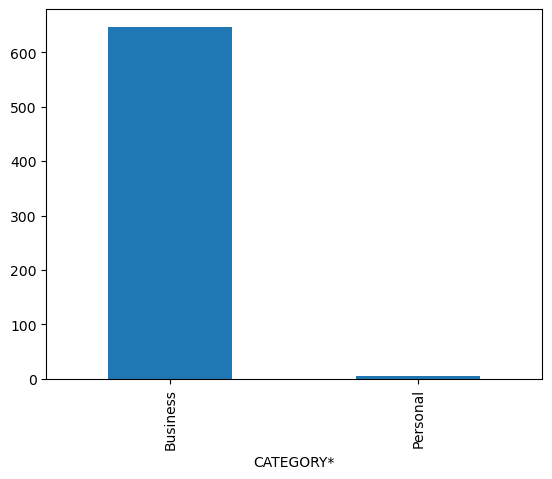

In [34]:
data['CATEGORY*'].value_counts().plot(kind='bar')

We have large number of business rides caegory as against very few personal rides.

# How long do people travel with Uber?

<Axes: ylabel='Frequency'>

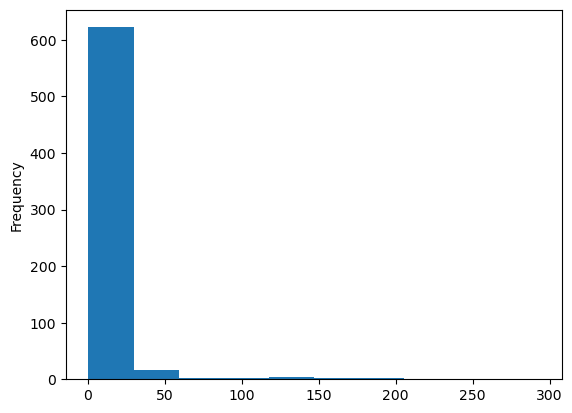

In [35]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber

# What Hour Do Most People Take Uber To Their Destination?

In [36]:
data['START_DATE*'].dt.hour.value_counts()

START_DATE*
13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of trips Vs hours')

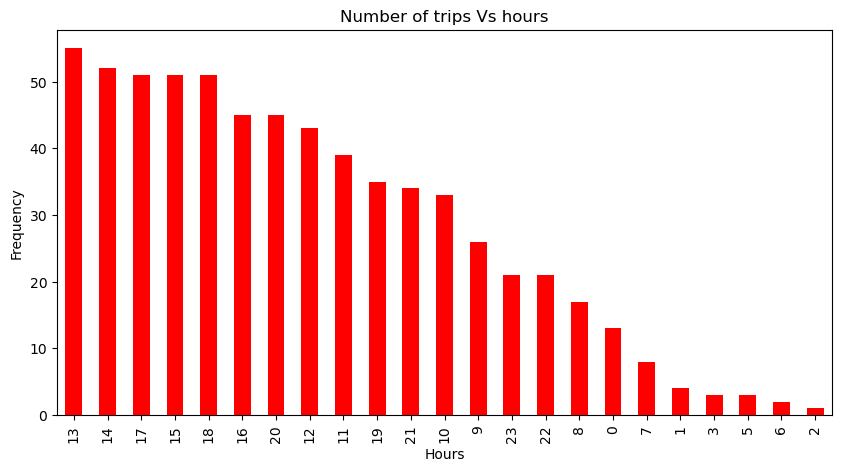

In [37]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

# Check The Purpose Of Trips

In [38]:
data['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

<Axes: xlabel='PURPOSE*'>

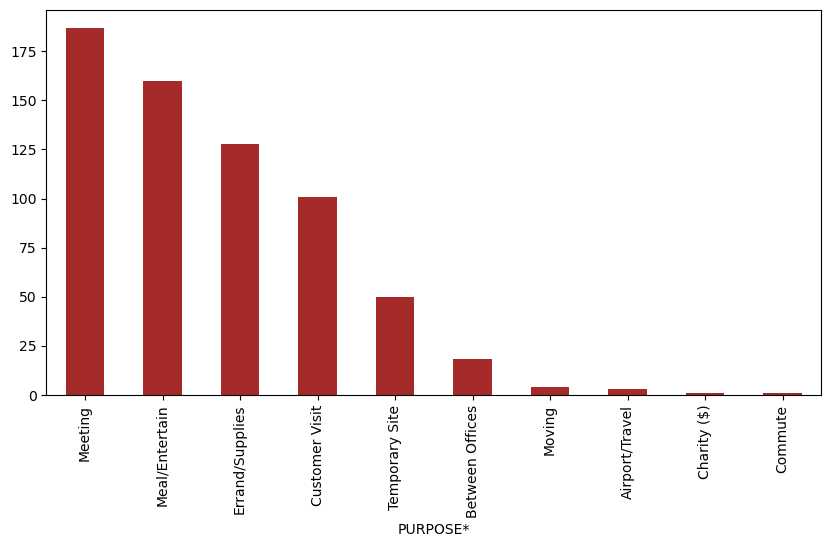

In [41]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

# Which Day Has The Highest Number Of Trips

<Axes: xlabel='WEEKDAY'>

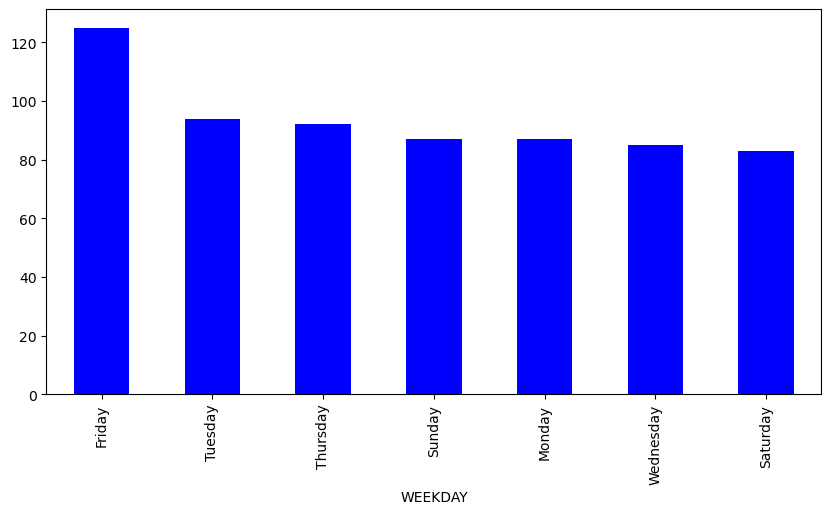

In [42]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

So Friday has the highest number of Trips

# What Are The Number Of Trips Per Each Day?

<Axes: xlabel='DAY'>

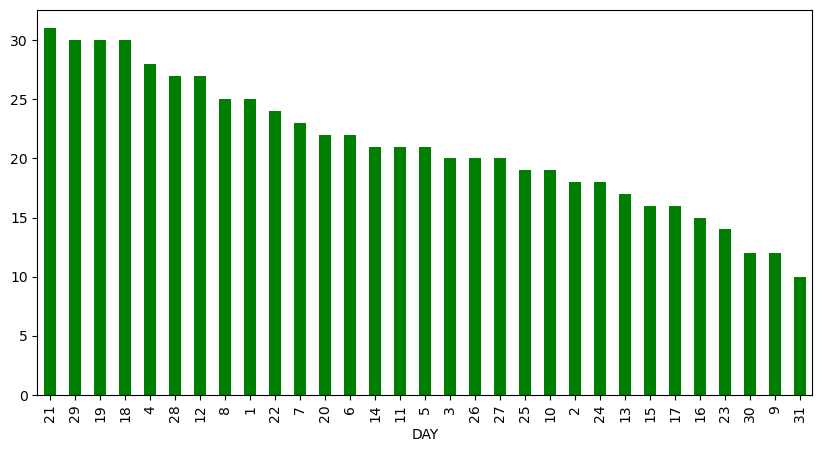

In [43]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

# What Are The Trips In The Month

<Axes: xlabel='MONTH'>

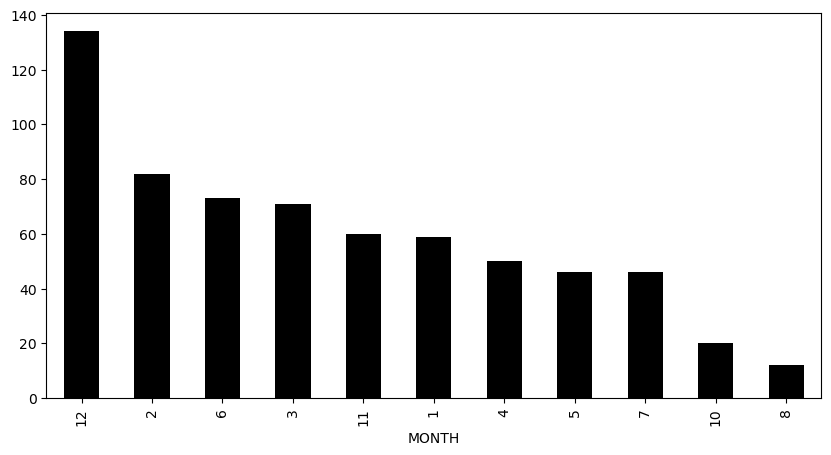

In [44]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

We Can see that December(12) has the most trips.

# The starting points of trips. Where Do People Start Boarding Their Trip From Most?

<Axes: xlabel='START*'>

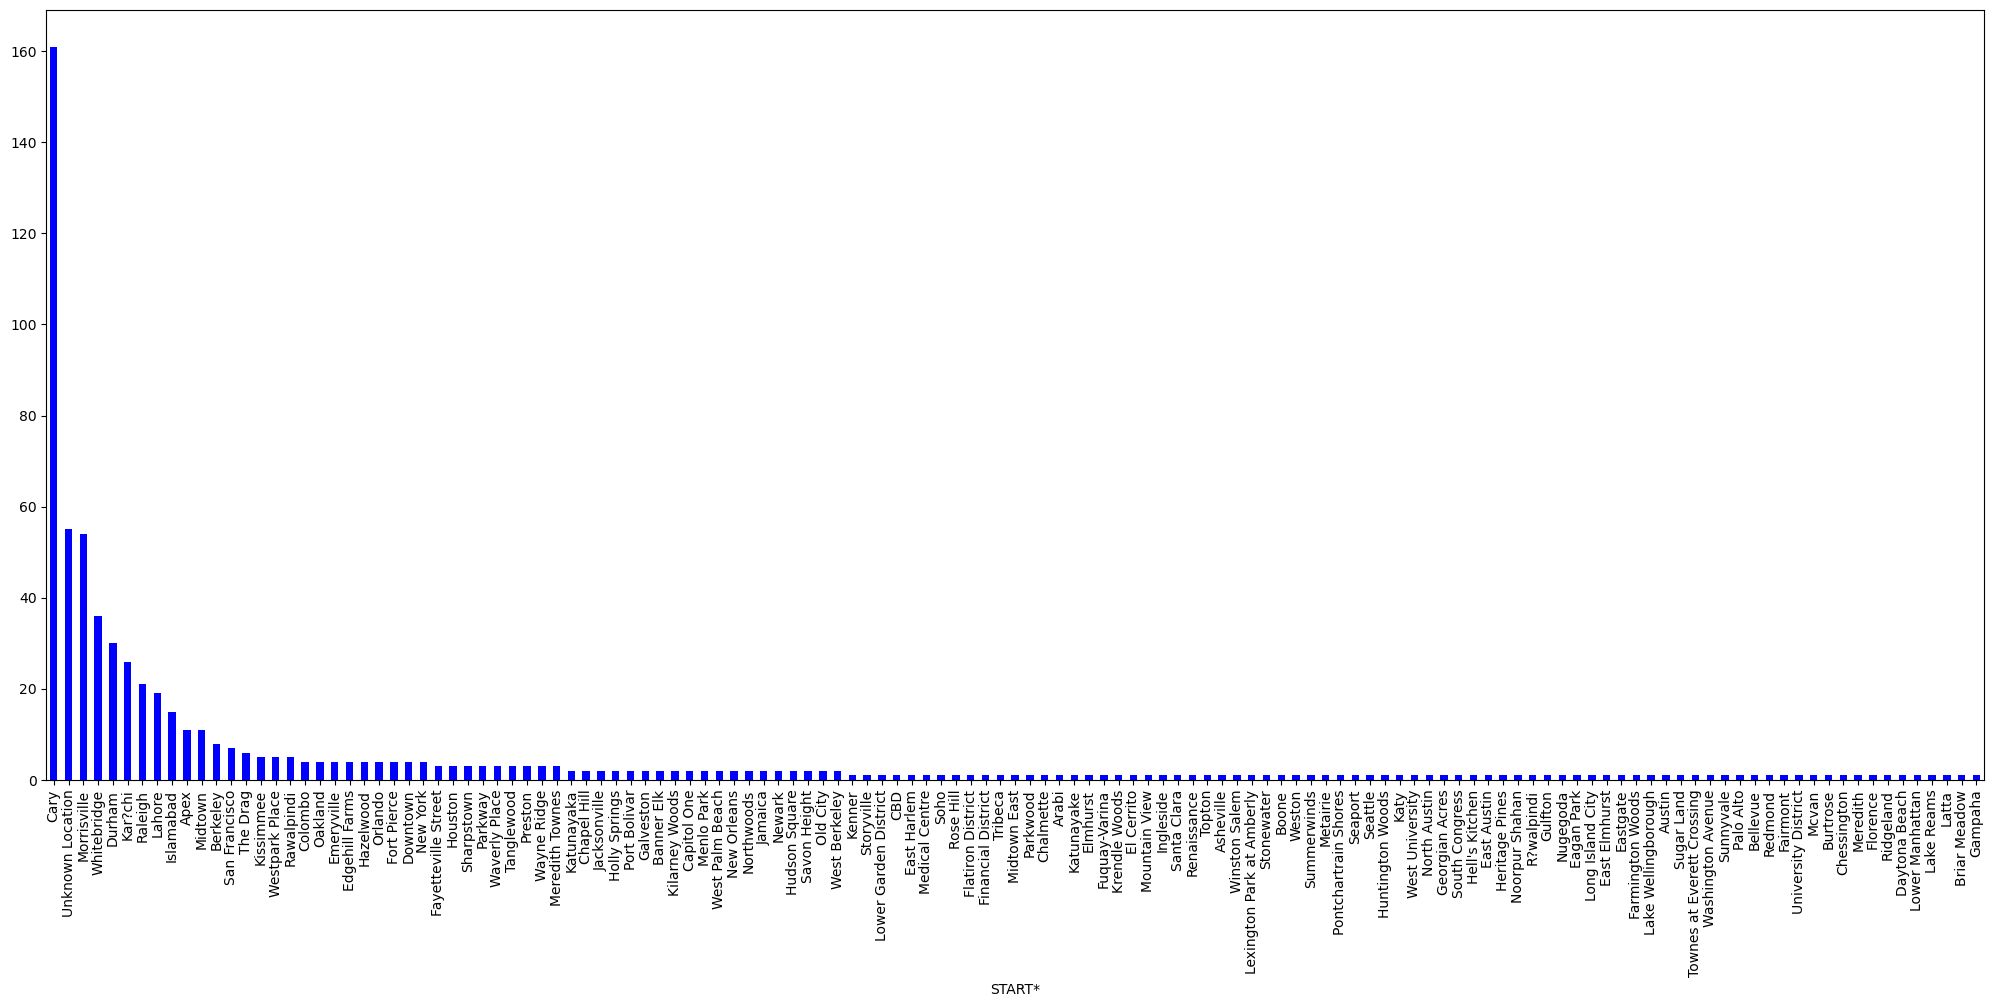

In [46]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset starts their jorney from cary followed by some
unknown location and then Morrisville.